In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [177]:
from sklearn.datasets import make_blobs, fetch_20newsgroups
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.utils.extmath import density

In [69]:
X, Y = make_blobs(n_samples=50,centers = 2,random_state=0,cluster_std=0.6)

In [83]:
clf = SGDClassifier(loss="hinge",alpha=0.02, max_iter=200) 
clf.fit(X,Y)

SGDClassifier(alpha=0.02, max_iter=200)

In [84]:
xx = np.linspace(-1,5, 10)
yy = np.linspace(-1,5, 10)

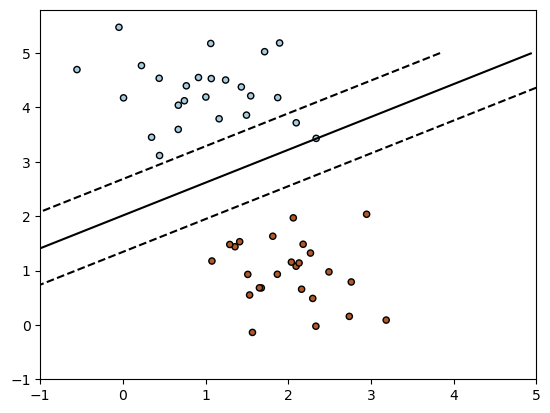

In [85]:
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

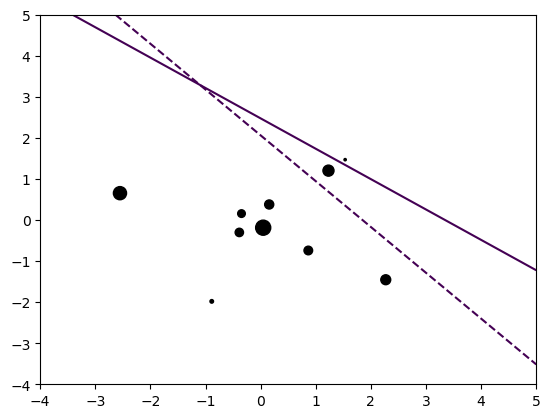

In [158]:
np.random.seed(0)
X = np.r_[np.random.randn(10,2) + [1,1], np.random.randn(10,2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))


xx, yy = np.meshgrid(np.linspace(-4,5,500), np.linspace(-4,5,500))
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,s=sample_weight,cmap=plt.cm.bone)


from sklearn import linear_model
#no weight
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y) 
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["solid"])

#weight

clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["dashed"])



In [160]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [171]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

2034 documents - 3.98MB (training set)
1353 documents - 2.87MB (test set)
4 categories
vectorize training done in 0.216s at 18.417MB/s
n_samples: 2034, n_features: 7831
vectorize testing done in 0.143s at 20.018MB/s
n_samples: 1353, n_features: 7831


[Text(0, 0, 'alt.atheism'),
 Text(1, 0, 'comp.graphics'),
 Text(2, 0, 'sci.space'),
 Text(3, 0, 'talk.religion.misc')]

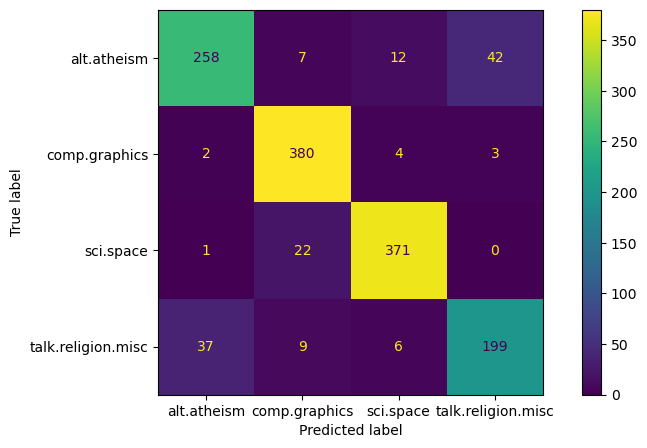

In [173]:
fig, ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax = ax)
ax.set_yticklabels(target_names)
ax.set_xticklabels(target_names)

In [174]:
#stripping metada 

(
    X_train,
    X_test,
    y_train,
    y_test,
    feature_names,
    target_names,
) = load_dataset(remove=("headers", "footers", "quotes"))

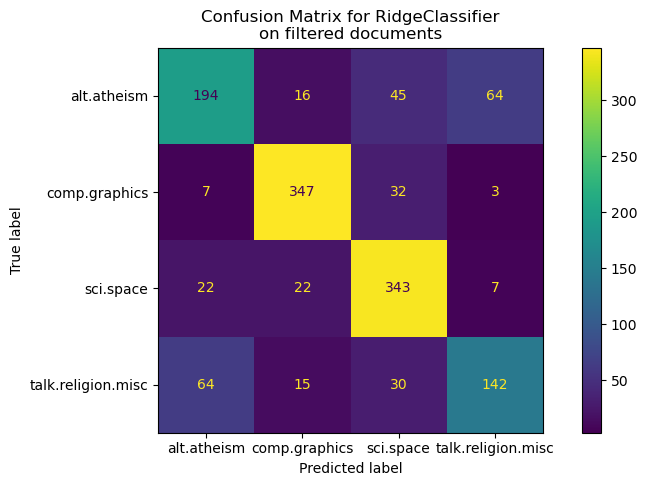

In [175]:
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non filtered documents"
)

In [180]:
def benchmark(clf, custom_name=False):
    print("_" *80)
    print("Training")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time : {train_time:.3}s ")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time : {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy: {score:.3}")

    if(hasattr(clf,"coef_")):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}" )
        print()

    print()

    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC

In [186]:
results = []

for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Log Reg"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Clas"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    (SGDClassifier(
        loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True
    ), "log-loss SGD")
):
    print("=" * 80),
    print(name),
    results.append(benchmark(clf,name))



Log Reg
________________________________________________________________________________
Training
LogisticRegression(C=5, max_iter=1000)
train time : 0.262s 
test time : 0.000561s
accuracy: 0.773
dimensionality: 5316
density: 1.0


Ridge Clas
________________________________________________________________________________
Training
RidgeClassifier(solver='sparse_cg')
train time : 0.019s 
test time : 0.000378s
accuracy: 0.76
dimensionality: 5316
density: 1.0


kNN
________________________________________________________________________________
Training
KNeighborsClassifier(n_neighbors=100)
train time : 0.000428s 
test time : 0.554s
accuracy: 0.752

Linear SVC
________________________________________________________________________________
Training
LinearSVC(C=0.1, dual=False)
train time : 0.0848s 
test time : 0.000375s
accuracy: 0.752
dimensionality: 5316
density: 1.0


log-loss SGD
________________________________________________________________________________
Training
SGDClassifier(ea